# Analisis Komparatif Saham Perbankan BUMN Indonesia
**Tujuan Analisis:**
Laporan ini bertujuan untuk melakukan analisis komparatif mendalam terhadap lima saham bank BUMN terbesar di Indonesia. Analisis ini tidak hanya melihat kinerja pertumbuhan harga, tetapi juga mengevaluasi tingkat risiko (volatilitas), efisiensi risk-return, dan tren harga.

**Saham yang Dianalisis:**

1. Bank Mandiri (BMRI.JK)
2. Bank Rakyat Indonesia (BBRI.JK)
3. Bank Negara Indonesia (BBNI.JK)
4. Bank Tabungan Negara (BBTN.JK)
5. Bank Syariah Indonesia (BRIS.JK)

**Periode Analisis:** 1 Januari 2020 - Hari Ini.

# 1. Import Library

In [19]:
# 1. Import Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

In [2]:
# 2. Setup Tampilan Grafik
plt.style.use('seaborn-v0_8-whitegrid')
# Mengatur ukuran default untuk semua plot matplotlib
plt.rcParams['figure.figsize'] = (15, 7)

# 2. Pengumpulan & Persiapan Data
Data historis harga saham diambil dari Yahoo Finance menggunakan library yfinance. Data ini mencakup harga Open, High, Low, Close (OHLC), Adjusted Close, dan Volume perdagangan harian.

In [8]:
# Daftar ticker saham bank BUMN
tickers = ['BMRI.JK', 'BBRI.JK', 'BBNI.JK', 'BBTN.JK', 'BRIS.JK']

# Tentukan periode waktu
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

print(f"Mengunduh data untuk: {tickers}")
print(f"Periode: {start_date} hingga {end_date}")
print("-" * 30)

try:
    bank_data = yf.download(tickers, start=start_date, end=end_date)

    # Validasi dan Informasi Data
    if bank_data.empty:
        print("❌ GAGAL: Data yang diunduh kosong. Periksa kembali ticker atau periode waktu.")
    else:
        print("✅ Data Berhasil Diunduh!")

        # Cetak kolom level atas yang tersedia agar kita tahu data apa saja yang kita miliki
        print("\nKolom data utama yang tersedia:")
        # .levels[0] digunakan untuk mengakses kolom level atas pada MultiIndex
        print(bank_data.columns.levels[0])

        # Tampilkan beberapa baris pertama dari data harga penutupan untuk konfirmasi
        print("\nContoh data harga penutupan ('Close'):")
        print(bank_data['Close'].head())

except Exception as e:
    print(f"❌ Terjadi error saat proses unduh: {e}")

[*********************100%***********************]  5 of 5 completed

Mengunduh data untuk: ['BMRI.JK', 'BBRI.JK', 'BBNI.JK', 'BBTN.JK', 'BRIS.JK']
Periode: 2020-01-01 hingga 2025-06-10
------------------------------
✅ Data Berhasil Diunduh!

Kolom data utama yang tersedia:
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

Contoh data harga penutupan ('Close'):
Ticker          BBNI.JK      BBRI.JK      BBTN.JK      BMRI.JK     BRIS.JK
Date                                                                      
2020-01-02  3087.432373  2960.843262  1631.684937  2800.025635  312.915192
2020-01-03  3097.359619  2967.557129  1647.005859  2790.993408  309.145142
2020-01-06  3027.867432  2933.987305  1631.684937  2745.831299  305.375092
2020-01-07  2998.085205  2954.129395  1624.024170  2745.831299  299.720001
2020-01-08  2948.447754  2940.701416  1585.721802  2709.702393  294.064880


# 3. Analisis Kinerja Pertumbuhan Harga (Interaktif)
Untuk membandingkan kinerja antar saham secara adil, kita perlu melakukan normalisasi harga. Ini akan menunjukkan pertumbuhan relatif dari setiap saham jika kita menganggap semua harga dimulai dari titik yang sama (nilai 1) pada awal periode.

Visualisasi ini dibuat interaktif menggunakan Plotly untuk eksplorasi yang lebih mendalam.

In [9]:
# Cek kolom mana yang tersedia: 'Adj Close' atau 'Close'
if 'Adj Close' in bank_data.columns:
    print("Menggunakan 'Adj Close' sebagai data harga utama.")
    adj_close_prices = bank_data['Adj Close']
else:
    print("Menggunakan 'Close' sebagai data harga utama.")
    adj_close_prices = bank_data['Close']

# Hapus baris yang datanya mungkin tidak lengkap untuk semua saham (misal karena baru IPO)
adj_close_prices.dropna(inplace=True)

# Hitung daily returns dari data harga yang sudah kita pilih
daily_returns = adj_close_prices.pct_change().dropna()

print("\nData harga siap untuk dianalisis.")
print("Dimensi data daily_returns:", daily_returns.shape)

Menggunakan 'Close' sebagai data harga utama.

Data harga siap untuk dianalisis.
Dimensi data daily_returns: (1305, 5)


<ipython-input-9-13c81226a26d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_close_prices.dropna(inplace=True)


Dengan data harga yang sudah disiapkan, kita lakukan normalisasi untuk membandingkan pertumbuhan relatif setiap saham dari titik awal yang sama.

In [12]:
# Normalisasi Harga Saham
normalized_prices = adj_close_prices.div(adj_close_prices.iloc[0])

# Membuat plot interaktif dengan Plotly Express
fig = px.line(
    normalized_prices,
    title='Perbandingan Kinerja Interaktif Saham Bank BUMN',
    labels={'value': 'Pertumbuhan Harga (Dinormalisasi)', 'Date': 'Tanggal', 'variable': 'Ticker'}
)

# Menambahkan Anotasi untuk Kinerja Tertinggi & Terendah

# Dapatkan data pada hari terakhir
last_day_data = normalized_prices.iloc[-1]
last_date = normalized_prices.index[-1]

# Cari saham dengan kinerja tertinggi dan terendah
best_performer_ticker = last_day_data.idxmax()
best_performer_value = last_day_data.max()

worst_performer_ticker = last_day_data.idxmin()
worst_performer_value = last_day_data.min()

# Tambahkan anotasi untuk Kinerja Tertinggi
fig.add_annotation(
    x=last_date, y=best_performer_value,
    # Tambahkan nilai numerik ke dalam teks
    text=f"<b>Tertinggi: {best_performer_ticker}</b><br>{best_performer_value:.2f}x Pertumbuhan",
    showarrow=True, arrowhead=2, arrowcolor="#2ecc71",
    font=dict(size=11, color="#2ecc71"),
    align="center", ax=0, ay=-60
)

# Tambahkan anotasi untuk Kinerja Terendah
fig.add_annotation(
    x=last_date, y=worst_performer_value,
    # Tambahkan nilai numerik ke dalam teks
    text=f"<b>Terendah: {worst_performer_ticker}</b><br>{worst_performer_value:.2f}x Pertumbuhan",
    showarrow=True, arrowhead=2, arrowcolor="#e74c3c",
    font=dict(size=11, color="#e74c3c"),
    align="center", ax=0, ay=60
)

# Kustomisasi Tampilan Akhir
fig.update_layout(
    title_x=0.5,
    legend_title_text='Ticker Saham',
    font=dict(family="Arial, sans-serif", size=12),

    # Hilangkan gridline dan ubah warna background
    plot_bgcolor='white', # Membuat background plot menjadi putih
    xaxis_showgrid=False, # Menghilangkan grid vertikal
    yaxis_showgrid=False  # Menghilangkan grid horizontal
)

# Menambahkan garis sumbu X dan Y agar tetap terlihat jelas
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')


fig.show()

### Interpretasi Kinerja (Analisis per 10 Juni 2025)

Berdasarkan data terkini, visualisasi kinerja saham menunjukkan adanya dinamika pasar yang menarik dan sebuah pembalikan tren yang signifikan:

* **Pemimpin Baru (Current Outperformer):** Secara mengejutkan, **BBNI.JK** kini memimpin sebagai saham dengan pertumbuhan tertinggi (1.22x) sejak awal periode. Ini menandakan bahwa BBNI memiliki momentum positif yang kuat dalam beberapa waktu terakhir, berhasil melampaui saham-saham lainnya.

* **Pembalikan Tren & Koreksi Tajam (Former Leader):** Saham **BRIS.JK**, yang sebelumnya menunjukkan pertumbuhan paling eksplosif dan sempat menjadi pemimpin jangka panjang, kini justru berada di posisi terendah (0.70x). Ini mengindikasikan BRIS telah mengalami koreksi atau penurunan harga yang sangat dalam baru-baru ini, menghapus sebagian besar keuntungan yang telah terakumulasi.

* **Stabilitas di Tengah:** Saham **BMRI.JK**, **BBRI.JK**, dan **BBTN.JK** menunjukkan pergerakan yang lebih moderat dan cenderung berada di tengah. Kinerja mereka tidak seekstrem BBNI yang menguat ataupun BRIS yang melemah secara drastis dalam periode terakhir.

**Insight Kunci:**
Analisis ini menyoroti betapa pentingnya horison waktu dalam menilai sebuah investasi. Sebuah saham yang menjadi bintang dalam jangka panjang bisa mengalami tekanan jual hebat dalam jangka pendek, dan sebaliknya. Data per 10 Juni 2025 ini menangkap sebuah momen di mana sentimen pasar terhadap BBNI sedang menguat, sementara BRIS sedang dalam fase *downtrend* yang kuat.

# 4. Analisis Risiko (Volatility) & Risk-Return
Sekarang kita gunakan `daily_returns` yang sudah dihitung untuk menganalisis risiko.

Box Plot menunjukkan sebaran atau volatilitas pergerakan harga harian.
Scatter Plot memetakan hubungan antara Risiko (Volatility) dan Imbal Hasil (Return).

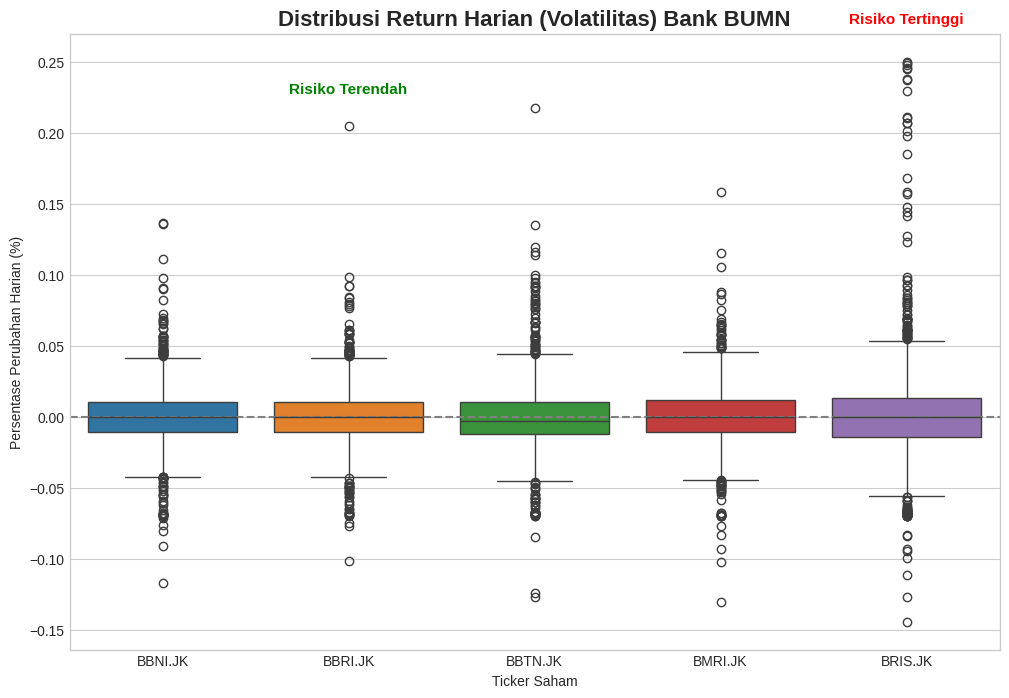

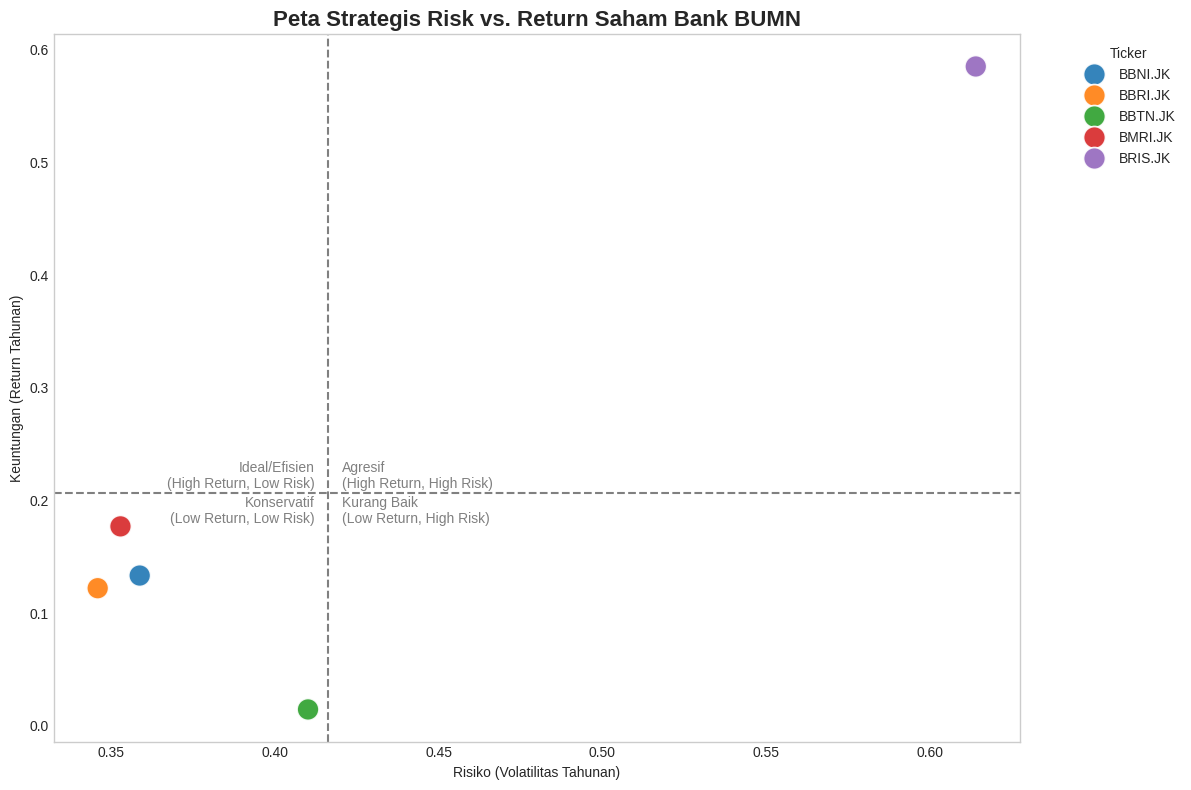

In [14]:
# 4.1 Visualisasi Volatilitas dengan Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=daily_returns)
plt.title('Distribusi Return Harian (Volatilitas) Bank BUMN', fontsize=16, fontweight='bold')
plt.ylabel('Persentase Perubahan Harian (%)')
plt.xlabel('Ticker Saham')
plt.axhline(0, color='grey', linestyle='--')

# Menambahkan Anotasi Volatilitas Tertinggi & Terendah

# 1. Hitung standar deviasi (ukuran volatilitas) untuk setiap saham
volatility = daily_returns.std()

# 2. Cari saham dengan volatilitas tertinggi dan terendah
highest_vol_ticker = volatility.idxmax()
lowest_vol_ticker = volatility.idxmin()

# 3. Dapatkan posisi untuk menempatkan teks anotasi
# Posisi x: 0 untuk saham pertama, 1 untuk kedua, dst.
x_pos_high = list(daily_returns.columns).index(highest_vol_ticker)
# Posisi y: Sedikit di atas nilai maksimum (ujung "kumis" atas) dari box plot
y_pos_high = daily_returns[highest_vol_ticker].max() * 1.1

x_pos_low = list(daily_returns.columns).index(lowest_vol_ticker)
y_pos_low = daily_returns[lowest_vol_ticker].max() * 1.1

# 4. Tambahkan teks anotasi ke plot
plt.text(x_pos_high, y_pos_high, 'Risiko Tertinggi', ha='center', va='bottom',
         fontweight='bold', color='red', fontsize=11)

plt.text(x_pos_low, y_pos_low, 'Risiko Terendah', ha='center', va='bottom',
         fontweight='bold', color='green', fontsize=11)

plt.show()

# 4.2 Visualisasi Risk vs Return
# Hitung rata-rata return tahunan dan volatilitas tahunan
# Ada sekitar 252 hari trading dalam setahun, ini asumsi standar industri
summary = pd.DataFrame()
summary['Annual Return'] = daily_returns.mean() * 252
summary['Annual Volatility'] = daily_returns.std() * (252**0.5)

# Menambahkan Garis Kuadran dan Label

# 1. Hitung rata-rata return dan volatilitas sebagai garis pembatas
avg_return = summary['Annual Return'].mean()
avg_volatility = summary['Annual Volatility'].mean()

# 2. Membuat Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=summary, x='Annual Volatility', y='Annual Return', hue=summary.index, s=250, alpha=0.9)

# 3. Gambar garis kuadran
plt.axvline(avg_volatility, color='grey', linestyle='--')
plt.axhline(avg_return, color='grey', linestyle='--')

# 4. Beri label pada setiap kuadran untuk stakeholder
plt.text(avg_volatility * 1.01, avg_return * 1.01, 'Agresif\n(High Return, High Risk)', fontsize=10, color='grey', va='bottom')
plt.text(avg_volatility * 0.99, avg_return * 1.01, 'Ideal/Efisien\n(High Return, Low Risk)', fontsize=10, color='grey', ha='right', va='bottom')
plt.text(avg_volatility * 0.99, avg_return * 0.99, 'Konservatif\n(Low Return, Low Risk)', fontsize=10, color='grey', ha='right', va='top')
plt.text(avg_volatility * 1.01, avg_return * 0.99, 'Kurang Baik\n(Low Return, High Risk)', fontsize=10, color='grey', va='top')


# Kustomisasi Plot
plt.title('Peta Strategis Risk vs. Return Saham Bank BUMN', fontsize=16, fontweight='bold')
plt.xlabel('Risiko (Volatilitas Tahunan)')
plt.ylabel('Keuntungan (Return Tahunan)')
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False) # Grid dihilangkan agar kuadran lebih jelas
plt.tight_layout()
plt.show()

### Interpretasi Peta Strategis Risk-Return

Plot ini memetakan setiap saham ke dalam empat kuadran strategis berdasarkan rata-rata imbal hasil (return) dan risiko (volatilitas) di antara mereka.

* **Kuadran Kanan Atas (Agresif):** Ditempati oleh **BBNI.JK**. Saham ini menawarkan imbal hasil di atas rata-rata, namun dengan risiko yang juga di atas rata-rata. Ini adalah profil saham untuk pertumbuhan yang agresif.
* **Kuadran Kiri Bawah (Konservatif):** Ditempati oleh **BBRI.JK**, **BMRI.JK**, dan **BBTN.JK**. Saham-saham ini menawarkan imbal hasil dan risiko yang keduanya di bawah rata-rata. Mereka adalah pilihan yang lebih stabil dan konservatif.
* **Kuadran Kanan Bawah (Kurang Baik):** Ditempati oleh **BRIS.JK**. Ini adalah kuadran yang paling tidak diinginkan, karena saham ini memiliki risiko tertinggi namun memberikan imbal hasil terendah (bahkan negatif) dalam periode ini.
* **Kuadran Kiri Atas (Ideal/Efisien):** Saat ini tidak ada saham yang menempati kuadran ideal ini, yang menandakan tidak ada pilihan yang menawarkan imbal hasil tinggi dengan risiko rendah secara bersamaan.

**Implikasi untuk Stakeholder:** Peta ini mempermudah pengambilan keputusan strategis. Jika tujuannya adalah pertumbuhan agresif, **BBNI.JK** adalah kandidat utama. Jika tujuannya adalah stabilitas, maka kelompok **BBRI.JK, BMRI.JK, dan BBTN.JK** menjadi pilihan. **BRIS.JK** menunjukkan profil risiko-imbal hasil yang paling tidak menguntungkan pada data terkini.

# 5. Analisis Tren Jangka Panjang & Pendek
Kita gunakan Simple Moving Averages (SMA) pada data `adj_close_prices` untuk mengidentifikasi tren. SMA 50 hari untuk tren jangka pendek, dan SMA 200 hari untuk tren jangka panjang.

In [22]:
# Pilih satu saham sebagai contoh (Anda bisa mengubah ticker ini)
ticker_contoh = 'BRIS.JK'

# Buat DataFrame baru khusus untuk analisis ini
df_trend = pd.DataFrame()
# Pastikan menggunakan data harga yang konsisten dari Tahap 2
df_trend['Harga'] = adj_close_prices[ticker_contoh].dropna()

# Hitung Simple Moving Average (SMA)
df_trend['SMA50'] = df_trend['Harga'].rolling(window=50).mean()
df_trend['SMA200'] = df_trend['Harga'].rolling(window=200).mean()

# Deteksi Sinyal Golden Cross & Death Cross
df_trend['Sinyal'] = np.where(df_trend['SMA50'] > df_trend['SMA200'], 1, 0)
df_trend['Perpotongan'] = df_trend['Sinyal'].diff()

# Identifikasi Sinyal Terbaik & Terburuk
golden_crosses = df_trend[df_trend['Perpotongan'] == 1]
death_crosses = df_trend[df_trend['Perpotongan'] == -1]

points = {}
if not golden_crosses.empty:
    points['buy_highest'] = golden_crosses.loc[golden_crosses['Harga'].idxmax()]
    points['buy_lowest'] = golden_crosses.loc[golden_crosses['Harga'].idxmin()]
if not death_crosses.empty:
    points['sell_highest'] = death_crosses.loc[death_crosses['Harga'].idxmax()]
    points['sell_lowest'] = death_crosses.loc[death_crosses['Harga'].idxmin()]

# Membuat Grafik
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_trend.index, y=df_trend['Harga'], mode='lines', name='Harga Penutupan (Adj)', line=dict(color='skyblue')))
fig.add_trace(go.Scatter(x=df_trend.index, y=df_trend['SMA50'], mode='lines', name='SMA 50 Hari', line=dict(color='orange', dash='dash')))
fig.add_trace(go.Scatter(x=df_trend.index, y=df_trend['SMA200'], mode='lines', name='SMA 200 Hari', line=dict(color='red', dash='dash')))

# Tambahkan marker untuk 4 sinyal penting
if 'buy_highest' in points:
    pt = points['buy_highest']
    fig.add_trace(go.Scatter(x=[pt.name], y=[pt['Harga']], mode='markers', name='Sinyal Beli Tertinggi', marker=dict(color='green', size=15, symbol='star-triangle-up')))
if 'buy_lowest' in points:
    pt = points['buy_lowest']
    fig.add_trace(go.Scatter(x=[pt.name], y=[pt['Harga']], mode='markers', name='Sinyal Beli Terendah', marker=dict(color='limegreen', size=15, symbol='star-triangle-up')))
if 'sell_highest' in points:
    pt = points['sell_highest']
    fig.add_trace(go.Scatter(x=[pt.name], y=[pt['Harga']], mode='markers', name='Sinyal Jual Tertinggi', marker=dict(color='maroon', size=15, symbol='star-triangle-down')))
if 'sell_lowest' in points:
    pt = points['sell_lowest']
    fig.add_trace(go.Scatter(x=[pt.name], y=[pt['Harga']], mode='markers', name='Sinyal Jual Terendah', marker=dict(color='red', size=15, symbol='star-triangle-down')))

# Styling anotasi dengan tambahan tanggal
annotations = []
if 'buy_highest' in points:
    pt = points['buy_highest']
    annotations.append(dict(x=pt.name, y=pt['SMA50'], ax=0, ay=-80,
                            text=f"<b>Beli Tertinggi</b><br>{pt.name.strftime('%b %Y')}<br>Rp{pt['Harga']:,.0f}", # Tambahkan tanggal di sini
                            font=dict(color='black', size=11), showarrow=True, arrowhead=2,
                            bordercolor="green", borderwidth=1, bgcolor="rgba(230, 255, 230, 0.85)"))
if 'buy_lowest' in points:
    pt = points['buy_lowest']
    annotations.append(dict(x=pt.name, y=pt['SMA50'], ax=0, ay=-50,
                            text=f"<b>Beli Terendah</b><br>{pt.name.strftime('%b %Y')}<br>Rp{pt['Harga']:,.0f}", # Tambahkan tanggal di sini
                            font=dict(color='black', size=11), showarrow=True, arrowhead=2,
                            bordercolor="limegreen", borderwidth=1, bgcolor="rgba(230, 255, 230, 0.85)"))
if 'sell_highest' in points:
    pt = points['sell_highest']
    annotations.append(dict(x=pt.name, y=pt['SMA50'], ax=0, ay=80,
                            text=f"<b>Jual Tertinggi</b><br>{pt.name.strftime('%b %Y')}<br>Rp{pt['Harga']:,.0f}", # Tambahkan tanggal di sini
                            font=dict(color='black', size=11), showarrow=True, arrowhead=2,
                            bordercolor="maroon", borderwidth=1, bgcolor="rgba(255, 230, 230, 0.85)"))
if 'sell_lowest' in points:
    pt = points['sell_lowest']
    annotations.append(dict(x=pt.name, y=pt['SMA50'], ax=0, ay=50,
                            text=f"<b>Jual Terendah</b><br>{pt.name.strftime('%b %Y')}<br>Rp{pt['Harga']:,.0f}", # Tambahkan tanggal di sini
                            font=dict(color='black', size=11), showarrow=True, arrowhead=2,
                            bordercolor="red", borderwidth=1, bgcolor="rgba(255, 230, 230, 0.85)"))

# Update layout
fig.update_layout(title=f'Analisis Tren & Evaluasi Sinyal Crossover untuk {ticker_contoh}', title_x=0.5, legend_title_text='Legenda', yaxis_title='Harga (IDR)',
                  plot_bgcolor='white', xaxis_showgrid=False, yaxis_showgrid=False, annotations=annotations)
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

fig.show()

### Interpretasi Tren & Evaluasi Sinyal untuk BRIS.JK

Grafik analisis tren untuk BRIS.JK menceritakan sebuah kisah dramatis tentang fase pertumbuhan euforia yang diikuti oleh periode pelemahan jangka panjang. Anotasi sinyal membantu kita mengidentifikasi titik-titik balik krusial dalam cerita ini.

#### 1. Sinyal Beli: Konfirmasi di Puncak?

* Kita melihat adanya **"Sinyal Beli Terendah"** sekaligus **"Tertinggi"** yang terdeteksi pada **Januari 2021** di level harga tinggi, yaitu **Rp 2.550**. Ini adalah *insight* yang sangat penting.
* **Interpretasi:** Sinyal *Golden Cross* ini tidak muncul di harga rendah sebagai awal dari tren naik, melainkan muncul **setelah** harga mengalami kenaikan yang sangat masif. Ini lebih berfungsi sebagai sinyal konfirmasi bahwa momentum *bullish* saat itu sangat kuat. Namun, bagi investor, ini adalah sinyal masuk yang sangat berisiko karena terjadi di dekat puncak harga historisnya, yang terbukti menjadi awal dari pembalikan arah.

#### 2. Sinyal Jual: Peringatan Dini dan Konfirmasi Tren Turun

* **Sinyal Jual Paling Efektif (Tertinggi):** Peringatan pertama dan terpenting datang pada **April 2022**. Sebuah *Death Cross* muncul saat harga berada di **Rp 1.775**.
* **Interpretasi:** Ini adalah sinyal defensif yang krusial. Ia memberikan peringatan yang jelas bahwa tren telah berbalik menjadi *bearish* (tren turun) saat harga masih berada di level yang relatif tinggi. Menindaklanjuti sinyal ini dapat membantu investor menghindari kerugian yang lebih besar yang terjadi sesudahnya.

* **Sinyal Jual Konfirmasi (Terendah):** Dua tahun kemudian, pada **April 2024**, muncul lagi sinyal *Death Cross* kedua pada harga yang lebih rendah, yaitu **Rp 1.600**.
* **Interpretasi:** Kemunculan sinyal jual kedua ini mengonfirmasi bahwa tren pelemahan saham BRIS.JK bersifat jangka panjang dan persisten. Upaya harga untuk pulih kembali gagal menembus tren turunnya, dan sinyal ini menandai kelanjutan dari fase *bearish*.

### Implikasi Strategis untuk Stakeholder

Analisis spesifik pada BRIS.JK ini memberikan pelajaran berharga:

1.  **Bahaya FOMO (Fear of Missing Out):** Sinyal *Golden Cross* yang muncul di harga puncak adalah contoh klasik dari sinyal yang bisa menjebak investor yang masuk karena ikut-ikutan tren yang sudah berjalan lama.
2.  **Pentingnya Sinyal Jual sebagai Manajemen Risiko:** *Death Cross* yang muncul pada April 2022 terbukti menjadi alat manajemen risiko yang sangat efektif, memberikan kesempatan untuk keluar sebelum penurunan lebih lanjut.
3.  **Konfirmasi Tren Jangka Panjang:** Grafik ini secara visual mengonfirmasi narasi bahwa BRIS.JK mengalami fase *hype* yang luar biasa, diikuti oleh periode "normalisasi" atau tren turun yang panjang dan belum menunjukkan tanda-tanda pembalikan arah yang kuat hingga data terakhir pada grafik.

# 6. Kesimpulan Umum & Implikasi Strategis

Setelah melakukan analisis komparatif dari lima saham perbankan BUMN utama di Indonesia, kita dapat menarik kesimpulan bahwa setiap saham memiliki "kepribadian" dan profil investasi yang unik. Tidak ada satu saham pun yang unggul di semua metrik; pilihan terbaik sangat bergantung pada tujuan dan toleransi risiko para *stakeholder*.

### Profil Investasi Masing-Masing Saham

Berdasarkan temuan dari analisis kinerja, risiko, dan tren, kita dapat mengelompokkan saham-saham ini ke dalam beberapa profil strategis:

#### 1. Pemimpin Pertumbuhan Agresif: **BBNI.JK**
* **Karakteristik:** Menunjukkan kinerja pertumbuhan terkini yang paling unggul, namun diiringi dengan tingkat volatilitas (risiko) yang juga di atas rata-rata.
* **Profil Investor:** Paling cocok untuk investor yang mencari **pertumbuhan agresif** dan memiliki toleransi risiko yang tinggi, dengan fokus pada momentum pasar saat ini.

#### 2. Si Bintang Jatuh / Kasus Berisiko Tinggi: **BRIS.JK**
* **Karakteristik:** Meskipun pernah menjadi juara pertumbuhan jangka panjang, BRIS mengalami pembalikan tren yang tajam dan kini menjadi yang paling volatil. Analisis *Death Cross* mengonfirmasi fase *bearish* yang kuat.
* **Profil Investor:** Saat ini merupakan pilihan dengan **risiko tertinggi**. Membutuhkan analisis fundamental yang sangat mendalam untuk mempertimbangkan potensi *turnaround*, dan tidak disarankan untuk investor yang menghindari risiko.

#### 3. Inti yang Stabil (The Stable Core): **BBRI.JK** & **BMRI.JK**
* **Karakteristik:** Menawarkan keseimbangan yang baik antara risiko dan imbal hasil. Volatilitasnya cenderung lebih rendah dibandingkan BBNI dan BRIS, dengan pertumbuhan yang lebih moderat dan dapat diprediksi. Analisis trennya menunjukkan siklus pasar yang lebih wajar.
* **Profil Investor:** Merupakan **pilar portofolio** yang cocok untuk sebagian besar investor, baik yang mencari pertumbuhan jangka panjang yang stabil maupun yang memiliki toleransi risiko moderat.

#### 4. Si Konservatif: **BBTN.JK**
* **Karakteristik:** Menunjukkan tingkat volatilitas dan pertumbuhan yang paling rendah di antara kelimanya. Cenderung bergerak lebih lambat dan kurang reaktif terhadap dinamika pasar.
* **Profil Investor:** Pilihan yang paling **konservatif**, mungkin lebih cocok untuk tujuan menjaga nilai aset daripada mencari pertumbuhan yang signifikan.

### Implikasi Strategis untuk Stakeholder

1.  **Tidak Ada Jawaban Tunggal:** Analisis ini membuktikan bahwa pertanyaan "Saham mana yang terbaik?" tidak bisa dijawab tanpa konteks. Jawabannya tergantung pada strategi: Apakah kita mencari pertumbuhan cepat (BBNI), stabilitas (BBRI/BMRI), atau sedang mempertaruhkan pembalikan arah (BRIS)?

2.  **Momentum dan Waktu adalah Kunci:** Kasus BBNI yang menyalip BRIS menunjukkan bahwa kinerja masa lalu tidak menjamin kinerja masa depan. Analisis tren jangka pendek dan menengah, seperti *moving average*, sangat vital untuk menangkap perubahan momentum.

3.  **Manajemen Risiko itu Wajib:** Kisah BRIS adalah studi kasus yang sempurna tentang pentingnya sinyal manajemen risiko. Sinyal *Death Cross* terbukti menjadi indikator yang sangat berharga untuk menghindari kerugian lebih lanjut, menggarisbawahi pentingnya memiliki strategi keluar (*exit strategy*).

### Saran Langkah Selanjutnya
Untuk memperdalam analisis, langkah selanjutnya dapat mencakup:
* **Analisis Fundamental:** Menggabungkan data valuasi seperti P/E Ratio, PBV, dan ROE.
* **Analisis Korelasi dengan Indeks:** Melihat seberapa erat pergerakan saham-saham ini dengan IHSG.
* **Analisis Sentimen:** Mengolah data berita untuk mengukur sentimen pasar terhadap masing-masing bank.